In [21]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from scipy.stats import median_abs_deviation as mad

import muldoon
from muldoon import read_data as rd
from muldoon import met_timeseries as met
from muldoon import utils as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing file: WE__0190___________DER_WS__________________P02.csv


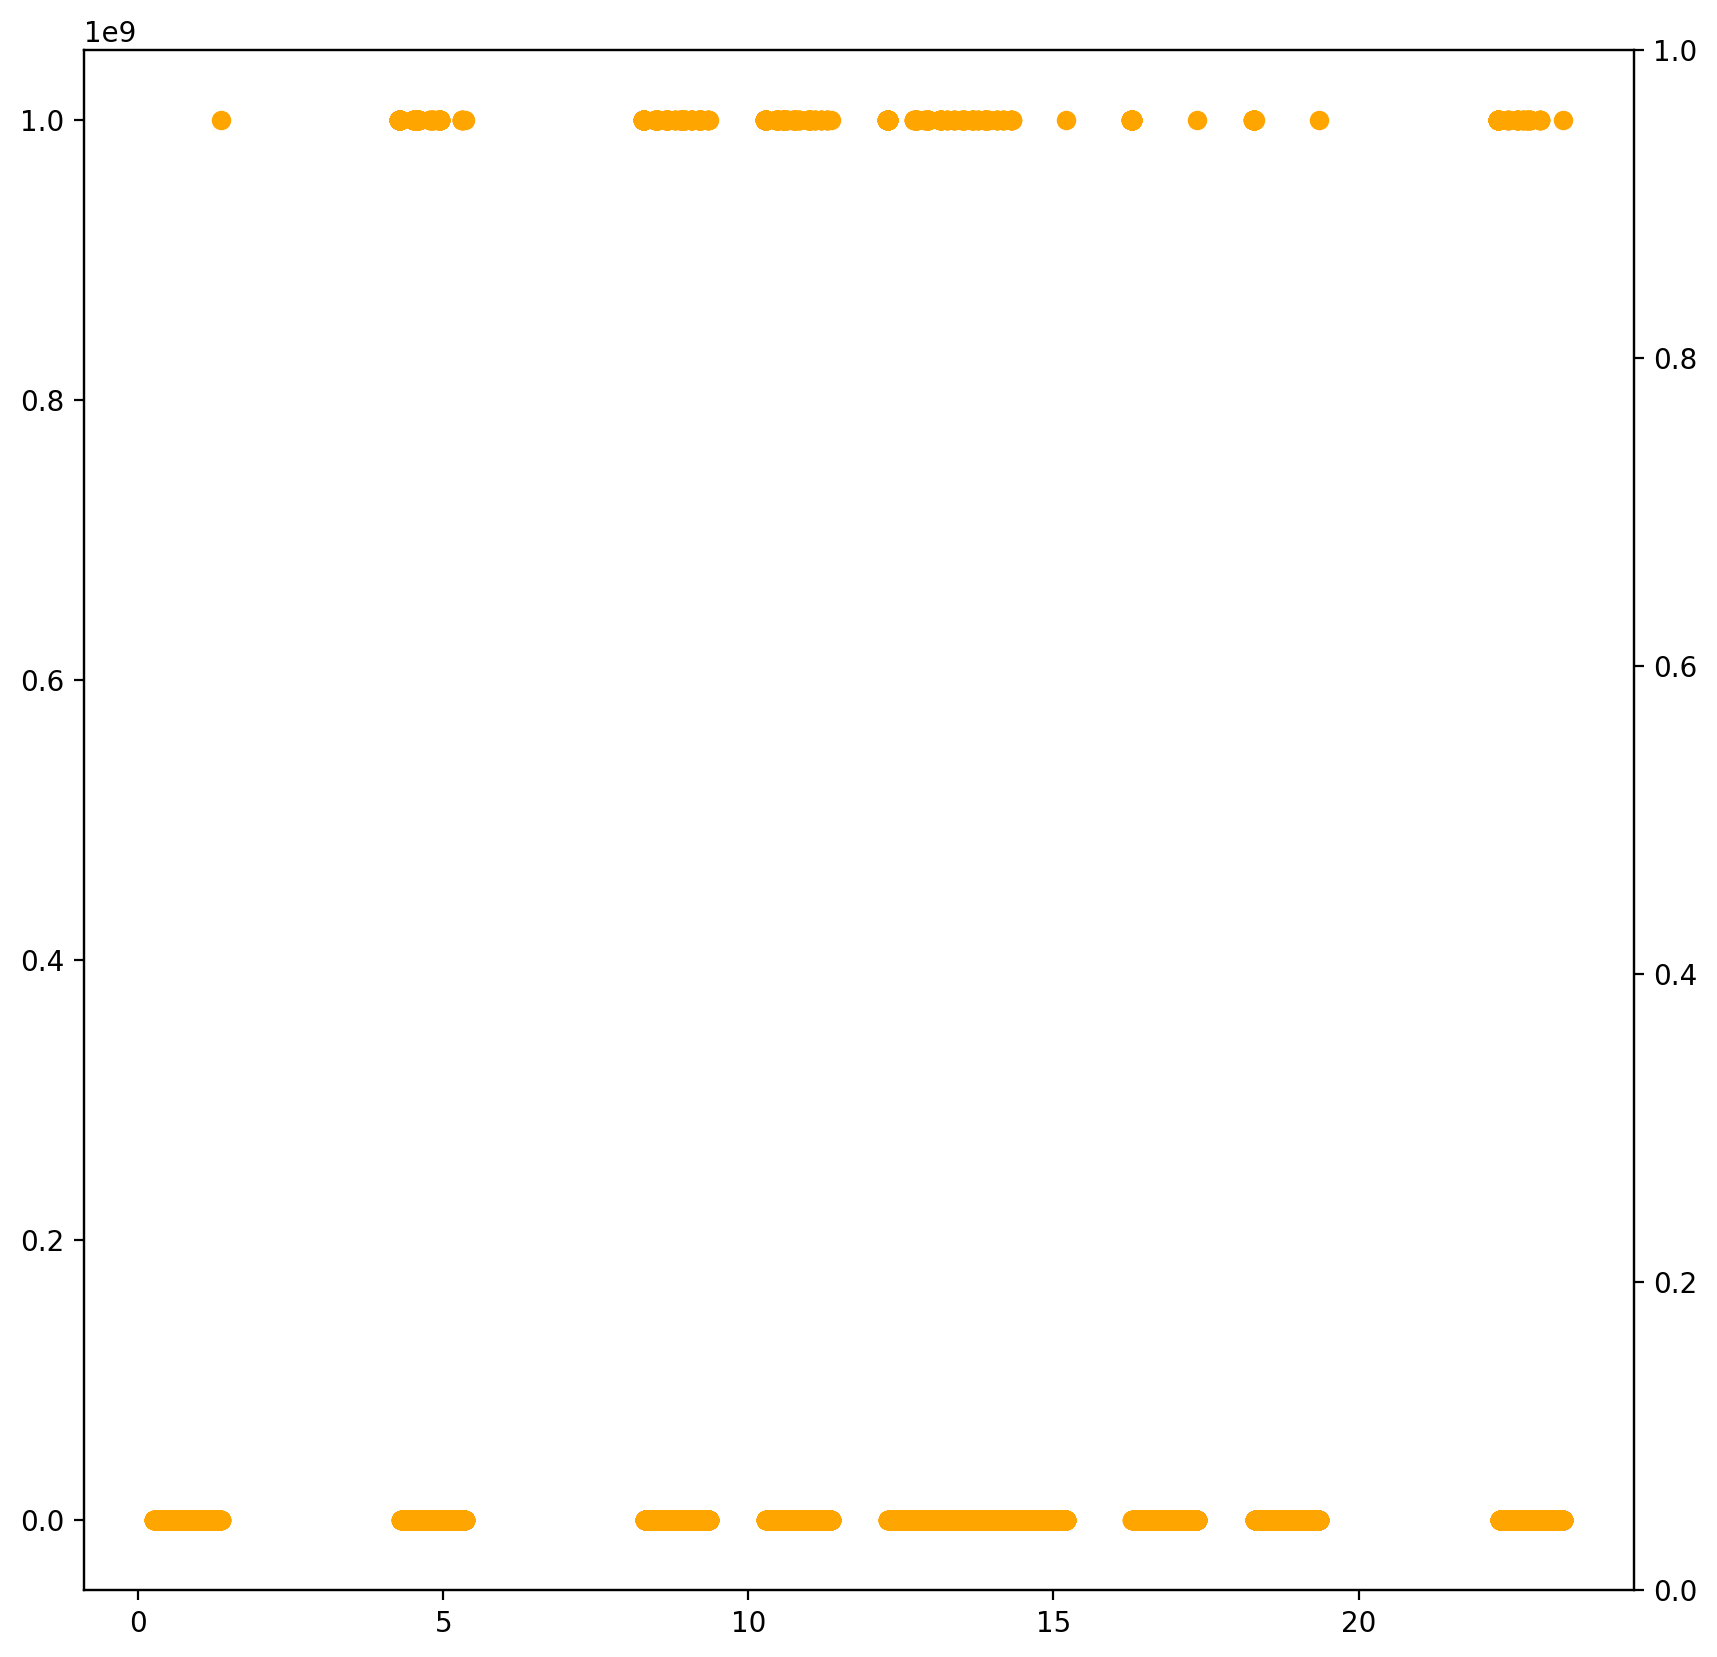

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

# Plots time and horizontal wind speed
filename="WE__0190___________DER_WS__________________P02.csv"
time, hor_wind_speed = rd.read_Perseverance_WS_data(filename)
ax.scatter(time, hor_wind_speed, color='orange')

In [24]:
# Tests get_vortex method
result = [time, hor_wind_speed]
vortex = ut.get_vortex(result)
print(vortex)

{'time': array([ 0.26555556,  0.26583333,  0.26611111, ..., 23.35472222,
       23.355     , 23.35527778]), 'data': array([1.63000000e+00, 1.52000000e+00, 1.52000000e+00, ...,
       3.13000000e+00, 2.91000000e+00, 9.99999999e+08])}


In [20]:
time = np.linspace(0.1, 22.1)
max_wind_speed = 23
u_1 = 3.5
slope = 1.
t0 = 0.
Gamma = 0.01 
expected = 0.0000910710
# Create a wind speed time series
profile = ut.wind_vortex_profile(max_wind_speed, u_1, slope, time, t0, Gamma)
if(profile == expected):
    assert True
wt_params = met.WindSpeedTimeseries(time, profile)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
# Get init_params

In [ ]:
# Get bounds

In [ ]:
# fit vortex